In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sweetviz as sv

In [325]:
# read csvs
sales_data = pd.read_csv('sales_data.csv')
outlet_data = pd.read_csv('outlets_data.csv')
product_data = pd.read_csv('product_data.csv')
week_data = pd.read_csv('week_data.csv')
freezer_data = pd.read_csv('freezer_data.csv')

In [326]:
sales_data.head()

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0


In [327]:
product_data.head()

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100


In [328]:
week_data

,week,Start Date,End Date
0,1,1/2/2023,1/8/2023
1,2,1/9/2023,1/15/2023
2,3,1/16/2023,1/22/2023
3,4,1/23/2023,1/29/2023
4,5,1/30/2023,2/5/2023
5,6,2/6/2023,2/12/2023
6,7,2/13/2023,2/19/2023
7,8,2/20/2023,2/26/2023
8,9,2/27/2023,3/5/2023
9,10,3/6/2023,3/12/2023


In [329]:
# Combining sales and products dataframes
sales_product_data = pd.merge(sales_data,product_data,how='left',on='pid')
sales_product_data.head()

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100


In [330]:
sum(sales_product_data.product_name_x == sales_product_data.product_name_y)

81000

In [331]:
sales_product_data.drop('product_name_y',axis=1,inplace=True)
sales_product_data.head()

,Outlet_ID,week,pid,product_name_x,no_units,volume,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100


In [332]:
# Combining sales products and week
sales_product_week_data = pd.merge(sales_product_data,week_data,how='left',on='week')
sales_product_week_data.head(10)

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,1/2/2023,1/8/2023
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,1/2/2023,1/8/2023
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,1/2/2023,1/8/2023
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,1/2/2023,1/8/2023
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,1/2/2023,1/8/2023
5,ID7203,2,IP1,Vanilla Mini Cone,644.0,0.2,100,1/9/2023,1/15/2023
6,ID7203,2,IP2,Chocolate Petite Bar,265.0,0.2,90,1/9/2023,1/15/2023
7,ID7203,2,IP3,Strawberry Tiny Cup,1106.0,0.2,110,1/9/2023,1/15/2023
8,ID7203,2,IP4,Mint Bite-size Pop,387.0,0.2,100,1/9/2023,1/15/2023
9,ID7203,3,IP1,Vanilla Mini Cone,600.0,0.2,100,1/16/2023,1/22/2023


In [333]:
# check for duplicates
duplicate = sales_product_week_data[sales_product_week_data.duplicated(['Outlet_ID','week','pid'])]
duplicate

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
5507,ID5859,1,IP1,Vanilla Mini Cone,1146.0,0.2,100,1/2/2023,1/8/2023
5508,ID5859,1,IP2,Chocolate Petite Bar,890.0,0.2,90,1/2/2023,1/8/2023
5509,ID5859,1,IP3,Strawberry Tiny Cup,755.0,0.2,110,1/2/2023,1/8/2023
5511,ID5859,1,IP5,Butter Pecan Small Stick,900.0,0.2,100,1/2/2023,1/8/2023
5513,ID5859,2,IP2,Chocolate Petite Bar,133.0,0.2,90,1/9/2023,1/15/2023
...,...,...,...,...,...,...,...,...,...
79577,ID7029,12,IP5,Butter Pecan Small Stick,454.0,0.2,100,3/20/2023,3/26/2023
79578,ID7029,12,BP1,Chocolate Fudge Big Scoop,43.0,1.0,1200,3/20/2023,3/26/2023
79579,ID7029,12,BP3,Mint Chocolate Chip Family Pack,77.0,1.0,1150,3/20/2023,3/26/2023
79580,ID7029,12,BP4,Rocky Road Mega Tub,67.0,1.0,1000,3/20/2023,3/26/2023


In [334]:
sales_product_week_data.loc[(sales_product_week_data.Outlet_ID=='ID5859') & (sales_product_week_data.week==1)]

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date
5454,ID5859,1,IP1,Vanilla Mini Cone,876.0,0.2,100,1/2/2023,1/8/2023
5455,ID5859,1,IP2,Chocolate Petite Bar,556.0,0.2,90,1/2/2023,1/8/2023
5456,ID5859,1,IP3,Strawberry Tiny Cup,532.0,0.2,110,1/2/2023,1/8/2023
5457,ID5859,1,IP5,Butter Pecan Small Stick,936.0,0.2,100,1/2/2023,1/8/2023
5507,ID5859,1,IP1,Vanilla Mini Cone,1146.0,0.2,100,1/2/2023,1/8/2023
5508,ID5859,1,IP2,Chocolate Petite Bar,890.0,0.2,90,1/2/2023,1/8/2023
5509,ID5859,1,IP3,Strawberry Tiny Cup,755.0,0.2,110,1/2/2023,1/8/2023
5510,ID5859,1,IP4,Mint Bite-size Pop,249.0,0.2,100,1/2/2023,1/8/2023
5511,ID5859,1,IP5,Butter Pecan Small Stick,900.0,0.2,100,1/2/2023,1/8/2023


In [335]:
# create new features

sales_product_week_data['total_volume'] = sales_product_week_data['no_units']*sales_product_week_data['volume']
sales_product_week_data['earning'] = sales_product_week_data['no_units']*sales_product_week_data['price']
sales_product_week_data.head(10)

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date,total_volume,earning
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,1/2/2023,1/8/2023,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,1/2/2023,1/8/2023,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,1/2/2023,1/8/2023,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,1/2/2023,1/8/2023,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,1/2/2023,1/8/2023,142.0,71000.0
5,ID7203,2,IP1,Vanilla Mini Cone,644.0,0.2,100,1/9/2023,1/15/2023,128.8,64400.0
6,ID7203,2,IP2,Chocolate Petite Bar,265.0,0.2,90,1/9/2023,1/15/2023,53.0,23850.0
7,ID7203,2,IP3,Strawberry Tiny Cup,1106.0,0.2,110,1/9/2023,1/15/2023,221.2,121660.0
8,ID7203,2,IP4,Mint Bite-size Pop,387.0,0.2,100,1/9/2023,1/15/2023,77.4,38700.0
9,ID7203,3,IP1,Vanilla Mini Cone,600.0,0.2,100,1/16/2023,1/22/2023,120.0,60000.0


In [336]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [337]:
# checking for duplicates in outlets and remove (keep the last record)
outlet_data.Outlet_ID.nunique()

951

In [338]:
duplicate = outlet_data[outlet_data.duplicated('Outlet_ID')]
duplicate

,Outlet_ID,area(sqft)
384,ID8278,4980
406,ID8631,3196
444,ID4003,2990
494,ID1365,1291
525,ID2170,6169
537,ID1485,9483
563,ID9465,6650
564,ID6214,4052
566,ID3549,9831
576,ID9672,7966


In [339]:
outlet_data.loc[outlet_data.Outlet_ID == 'ID9541']

,Outlet_ID,area(sqft)
601,ID9541,5468
942,ID9541,2074


In [340]:
outlet_data.drop_duplicates( subset = 'Outlet_ID',keep='last',inplace=True)
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [341]:
sales_product_week_data.Outlet_ID.nunique()

951

In [ ]:
outlets = outlet_data.Outlet_ID.unique()
products = product_data.pid.unique()
outlets,len(outlets),products,len(products)

In [355]:
# Mapping values from sales_product_week_data to outlet_data

# header names

header_lst_total_volume = ('Outlet_ID',)
for i in range(1,13):
    header_lst_total_volume = header_lst_total_volume+('W_'+str(i)+'_total_volume',) 
print(header_lst_total_volume)

header_lst_total_earning = ('Outlet_ID',)
for i in range(1,13):
    header_lst_total_earning = header_lst_total_earning+('W_'+str(i)+'_total_earning',) 
print(header_lst_total_earning)

header_lst_product_units = ('Outlet_ID',)
for i in products:
    header_lst_product_units = header_lst_product_units+(i+'_total_units',) 
print(header_lst_product_units)


# header_lst_total_units = ('Outlet_ID',)
# for i in range(1,13):
#     header_lst_total_units = header_lst_total_units+('W_'+str(i)+'_total_units',) 
# print(header_lst_total_units)

('Outlet_ID', 'W_1_total_volume', 'W_2_total_volume', 'W_3_total_volume', 'W_4_total_volume', 'W_5_total_volume', 'W_6_total_volume', 'W_7_total_volume', 'W_8_total_volume', 'W_9_total_volume', 'W_10_total_volume', 'W_11_total_volume', 'W_12_total_volume')
('Outlet_ID', 'W_1_total_earning', 'W_2_total_earning', 'W_3_total_earning', 'W_4_total_earning', 'W_5_total_earning', 'W_6_total_earning', 'W_7_total_earning', 'W_8_total_earning', 'W_9_total_earning', 'W_10_total_earning', 'W_11_total_earning', 'W_12_total_earning')
('Outlet_ID', 'IP1_total_units', 'IP2_total_units', 'IP3_total_units', 'IP4_total_units', 'IP5_total_units', 'BP1_total_units', 'BP2_total_units', 'BP3_total_units', 'BP4_total_units', 'BP5_total_units')


In [369]:
a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID=='ID7203')&(sales_product_week_data.pid=='BP2')]
a

,Outlet_ID,week,pid,product_name_x,no_units,volume,price,Start Date,End Date,total_volume,earning


In [93]:
total_volume_lst = []
for outlet_id in outlets:
    lst = [outlet_id]
    for week in range(1,13):
        a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID==outlet_id)&(sales_product_week_data.week==week)].total_volume.sum()
        lst.append(a)
    print(lst)
    total_volume_lst.append(lst)


['ID7203', 677.8000000000001, 480.4, 561.0000000000001, 516.6, 560.4000000000001, 645.4000000000001, 598.4, 627.6000000000001, 461.80000000000007, 496.8, 876.4000000000001, 446.6]
['ID1878', 519.4000000000001, 409.6, 561.8, 744.8000000000001, 642.6000000000001, 662.6000000000001, 576.6, 700.2, 662.4, 792.2, 442.0, 493.80000000000007]
['ID1740', 748.4, 641.6000000000001, 740.4, 612.0000000000001, 764.4000000000001, 638.0, 427.6, 562.4, 414.4000000000001, 616.2, 738.6000000000001, 613.4000000000001]
['ID4366', 682.0, 614.4000000000001, 768.6000000000001, 807.2, 465.6000000000001, 490.80000000000007, 636.2, 605.0, 795.0, 994.9999999999999, 485.20000000000005, 715.8]
['ID8358', 578.2, 837.0, 686.6, 910.4000000000001, 216.00000000000003, 719.6, 632.8, 699.4000000000001, 747.6, 566.2, 467.59999999999997, 814.2]
['ID4722', 730.2, 898.4000000000001, 504.4, 898.0, 923.2000000000002, 733.8000000000001, 656.6, 513.4000000000001, 596.8, 600.0, 641.2, 636.5999999999999]
['ID5579', 491.2000000000000

In [98]:
total_earning_lst = []
for outlet_id in outlets:
    lst = [outlet_id]
    for week in range(1,13):
        a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID==outlet_id)&(sales_product_week_data.week==week)].earning.sum()
        lst.append(a)
    print(lst)
    total_earning_lst.append(lst)


['ID7203', 349830.0, 248610.0, 275200.0, 259650.0, 271830.0, 327390.0, 301010.0, 320700.0, 227830.0, 241650.0, 437660.0, 231560.0]
['ID1878', 258390.0, 210660.0, 282580.0, 379070.0, 322280.0, 330430.0, 277250.0, 350880.0, 330170.0, 401670.0, 225080.0, 237880.0]
['ID1740', 371360.0, 321870.0, 369650.0, 300560.0, 385470.0, 316730.0, 215310.0, 277610.0, 211340.0, 312190.0, 370450.0, 303370.0]
['ID4366', 349180.0, 310920.0, 383500.0, 404840.0, 224220.0, 254280.0, 321540.0, 300490.0, 408690.0, 497280.0, 243100.0, 362090.0]
['ID8358', 286650.0, 422100.0, 340710.0, 454070.0, 101010.0, 354670.0, 309570.0, 347220.0, 383510.0, 282780.0, 233040.0, 403370.0]
['ID4722', 366160.0, 453210.0, 247690.0, 451360.0, 456520.0, 372850.0, 337410.0, 251460.0, 309570.0, 291980.0, 318860.0, 310660.0]
['ID5579', 240880.0, 312310.0, 268390.0, 253870.0, 254580.0, 231940.0, 193800.0, 377000.0, 246390.0, 278100.0, 392100.0, 183540.0]
['ID3876', 269290.0, 271230.0, 140640.0, 203790.0, 435600.0, 333320.0, 284620.0, 21

In [370]:
total_product_units = []
for outlet_id in outlets:
    lst = [outlet_id]
    for p in products:
        a = sales_product_week_data.loc[(sales_product_week_data.Outlet_ID==outlet_id)&(sales_product_week_data.pid==p)].no_units.sum()
        lst.append(a)
    print(lst)
    total_product_units.append(lst)


['ID7203', 6361.0, 7295.0, 9127.0, 5520.0, 6443.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID1878', 7860.0, 6622.0, 6856.0, 7954.0, 6748.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID1740', 7625.0, 8116.0, 7837.0, 7192.0, 6817.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID4366', 6530.0, 6259.0, 9232.0, 8759.0, 9524.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID8358', 7057.0, 9562.0, 7652.0, 6241.0, 8866.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID4722', 7103.0, 8264.0, 8407.0, 9065.0, 8824.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID5579', 7371.0, 4853.0, 6583.0, 6577.0, 6772.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID3876', 6575.0, 6079.0, 10027.0, 6223.0, 6968.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID7275', 6041.0, 8197.0, 8080.0, 6813.0, 4641.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID3726', 8025.0, 8295.0, 6375.0, 4733.0, 6471.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID9528', 5089.0, 7542.0, 6275.0, 5504.0, 4759.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID2152', 5877.0, 7009.0, 6669.0, 6887.0, 8757.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID3656', 8230.0, 7160.0, 6972.0, 8964.0, 7964.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['ID4395', 

In [371]:
# creating new dataframes

outlet_total_volume_per_week = pd.DataFrame(total_volume_lst, columns=header_lst_total_volume)
outlet_total_earning_per_week = pd.DataFrame(total_earning_lst, columns=header_lst_total_earning)
outlet_total_product_units = pd.DataFrame(total_product_units, columns=header_lst_product_units)

outlet_data_extra0 = pd.merge(outlet_total_volume_per_week,outlet_total_earning_per_week,how='left',on='Outlet_ID')
outlet_data_extra = pd.merge(outlet_data_extra0,outlet_total_product_units,how='left',on='Outlet_ID')
outlet_data_extra

,Outlet_ID,W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,W_9_total_volume,...,IP1_total_units,IP2_total_units,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units
0,ID7203,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,461.8,...,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,0.0,0.0,0.0,0.0
1,ID1878,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,662.4,...,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,0.0,0.0,0.0,0.0
2,ID1740,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,414.4,...,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,0.0,0.0,0.0,0.0
3,ID4366,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,795.0,...,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,0.0,0.0,0.0,0.0
4,ID8358,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,747.6,...,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,695.2,...,4179.0,5104.0,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,573.0
947,ID2978,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,590.8,...,4092.0,5710.0,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,679.0
948,ID6549,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,587.8,...,4932.0,6148.0,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,543.0
949,ID1210,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,933.0,...,4745.0,7020.0,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,677.0


In [372]:
final_outlet_data = pd.merge(outlet_data,outlet_data_extra,how='left',on='Outlet_ID')
final_outlet_data

,Outlet_ID,area(sqft),W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,...,IP1_total_units,IP2_total_units,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units
0,ID7203,5660,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,...,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,0.0,0.0,0.0,0.0
1,ID1878,4138,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,...,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,0.0,0.0,0.0,0.0
2,ID1740,5546,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,...,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,0.0,0.0,0.0,0.0
3,ID4366,5134,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,...,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,0.0,0.0,0.0,0.0
4,ID8358,4100,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,...,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,3858,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,...,4179.0,5104.0,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,573.0
947,ID2978,3495,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,...,4092.0,5710.0,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,679.0
948,ID6549,1141,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,...,4932.0,6148.0,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,543.0
949,ID1210,3322,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,...,4745.0,7020.0,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,677.0


In [373]:
final_outlet_data['total_volume'] = final_outlet_data['W_1_total_volume']+final_outlet_data['W_2_total_volume']+final_outlet_data['W_3_total_volume']+final_outlet_data['W_4_total_volume']+final_outlet_data['W_5_total_volume']+final_outlet_data['W_6_total_volume']+final_outlet_data['W_7_total_volume']+final_outlet_data['W_8_total_volume']+final_outlet_data['W_9_total_volume']+final_outlet_data['W_10_total_volume']+final_outlet_data['W_11_total_volume']+final_outlet_data['W_12_total_volume']
final_outlet_data['total_earning'] = final_outlet_data['W_1_total_earning']+final_outlet_data['W_2_total_earning']+final_outlet_data['W_3_total_earning']+final_outlet_data['W_4_total_earning']+final_outlet_data['W_5_total_earning']+final_outlet_data['W_6_total_earning']+final_outlet_data['W_7_total_earning']+final_outlet_data['W_8_total_earning']+final_outlet_data['W_9_total_earning']+final_outlet_data['W_10_total_earning']+final_outlet_data['W_11_total_earning']+final_outlet_data['W_12_total_earning']
final_outlet_data

,Outlet_ID,area(sqft),W_1_total_volume,W_2_total_volume,W_3_total_volume,W_4_total_volume,W_5_total_volume,W_6_total_volume,W_7_total_volume,W_8_total_volume,...,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units,total_volume,total_earning
0,ID7203,5660,677.8,480.4,561.0,516.6,560.4,645.4,598.4,627.6,...,9127.0,5520.0,6443.0,0.0,0.0,0.0,0.0,0.0,6949.2,3492920.0
1,ID1878,4138,519.4,409.6,561.8,744.8,642.6,662.6,576.6,700.2,...,6856.0,7954.0,6748.0,0.0,0.0,0.0,0.0,0.0,7208.0,3606340.0
2,ID1740,5546,748.4,641.6,740.4,612.0,764.4,638.0,427.6,562.4,...,7837.0,7192.0,6817.0,0.0,0.0,0.0,0.0,0.0,7517.4,3755910.0
3,ID4366,5134,682.0,614.4,768.6,807.2,465.6,490.8,636.2,605.0,...,9232.0,8759.0,9524.0,0.0,0.0,0.0,0.0,0.0,8060.8,4060130.0
4,ID8358,4100,578.2,837.0,686.6,910.4,216.0,719.6,632.8,699.4,...,7652.0,6241.0,8866.0,0.0,0.0,0.0,0.0,0.0,7875.6,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,3858,715.2,692.0,545.6,604.2,819.4,603.6,622.0,523.4,...,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,573.0,7693.0,5631520.0
947,ID2978,3495,846.6,666.2,573.6,719.0,395.2,825.4,702.6,499.8,...,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,679.0,8061.4,5942690.0
948,ID6549,1141,688.2,740.4,690.0,796.0,843.4,770.2,665.0,794.8,...,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,543.0,8826.0,6409630.0
949,ID1210,3322,701.8,817.6,649.2,1025.6,583.8,443.6,805.0,580.4,...,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,677.0,8526.8,6072600.0


In [374]:
# check for missing values
final_outlet_data.isna().any()

Outlet_ID             False
area(sqft)            False
W_1_total_volume      False
W_2_total_volume      False
W_3_total_volume      False
W_4_total_volume      False
W_5_total_volume      False
W_6_total_volume      False
W_7_total_volume      False
W_8_total_volume      False
W_9_total_volume      False
W_10_total_volume     False
W_11_total_volume     False
W_12_total_volume     False
W_1_total_earning     False
W_2_total_earning     False
W_3_total_earning     False
W_4_total_earning     False
W_5_total_earning     False
W_6_total_earning     False
W_7_total_earning     False
W_8_total_earning     False
W_9_total_earning     False
W_10_total_earning    False
W_11_total_earning    False
W_12_total_earning    False
IP1_total_units       False
IP2_total_units       False
IP3_total_units       False
IP4_total_units       False
IP5_total_units       False
BP1_total_units       False
BP2_total_units       False
BP3_total_units       False
BP4_total_units       False
BP5_total_units     

In [375]:
final_outlet_data.columns

Index(['Outlet_ID', 'area(sqft)', 'W_1_total_volume', 'W_2_total_volume',
       'W_3_total_volume', 'W_4_total_volume', 'W_5_total_volume',
       'W_6_total_volume', 'W_7_total_volume', 'W_8_total_volume',
       'W_9_total_volume', 'W_10_total_volume', 'W_11_total_volume',
       'W_12_total_volume', 'W_1_total_earning', 'W_2_total_earning',
       'W_3_total_earning', 'W_4_total_earning', 'W_5_total_earning',
       'W_6_total_earning', 'W_7_total_earning', 'W_8_total_earning',
       'W_9_total_earning', 'W_10_total_earning', 'W_11_total_earning',
       'W_12_total_earning', 'IP1_total_units', 'IP2_total_units',
       'IP3_total_units', 'IP4_total_units', 'IP5_total_units',
       'BP1_total_units', 'BP2_total_units', 'BP3_total_units',
       'BP4_total_units', 'BP5_total_units', 'total_volume', 'total_earning'],
      dtype='object')

In [378]:
final_outlet_data.to_csv('final_outlet_data.csv')

In [377]:
my_report = sv.analyze(final_outlet_data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [379]:
# standardize data

from sklearn.preprocessing import StandardScaler

col_names = ['area(sqft)','IP1_total_units', 'IP2_total_units',
       'IP3_total_units', 'IP4_total_units', 'IP5_total_units',
       'BP1_total_units', 'BP2_total_units', 'BP3_total_units',
       'BP4_total_units', 'BP5_total_units', 'total_volume', 'total_earning']
features = final_outlet_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,area(sqft),IP1_total_units,IP2_total_units,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units,total_volume,total_earning
0,0.572258,0.263263,0.496900,0.967113,0.045424,0.283891,-1.234048,-1.230801,-1.247381,-1.246543,-1.237590,-0.547728,-0.903290
1,-0.053819,0.666182,0.318596,0.370089,0.704526,0.365076,-1.234048,-1.230801,-1.247381,-1.246543,-1.237590,-0.504117,-0.880719
2,0.525364,0.603016,0.714415,0.627984,0.498184,0.383442,-1.234048,-1.230801,-1.247381,-1.246543,-1.237590,-0.451979,-0.850955
3,0.355887,0.308689,0.222424,0.994716,0.922512,1.103990,-1.234048,-1.230801,-1.247381,-1.246543,-1.237590,-0.360409,-0.790415
4,-0.069450,0.450342,1.097516,0.579350,0.240663,0.928844,-1.234048,-1.230801,-1.247381,-1.246543,-1.237590,-0.391617,-0.818560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,-0.168997,-0.323240,-0.083580,-0.393607,-0.229970,0.176089,-0.438558,-0.586100,-0.424661,-0.456656,-0.498431,-0.422388,-0.477709
947,-0.318318,-0.346625,0.076973,-0.135186,-0.093763,-0.153441,-0.425810,-0.592446,-0.393369,-0.351687,-0.361693,-0.360308,-0.415787
948,-1.286639,-0.120840,0.193016,-0.163578,0.133159,0.148672,-0.288129,-0.455384,-0.364684,-0.307075,-0.537131,-0.231462,-0.322866
949,-0.389482,-0.171104,0.424042,0.016239,-0.028773,-0.070127,-0.572415,-0.555642,-0.381634,-0.448783,-0.364273,-0.281882,-0.389935


Text(0, 0.5, 'Inertia')

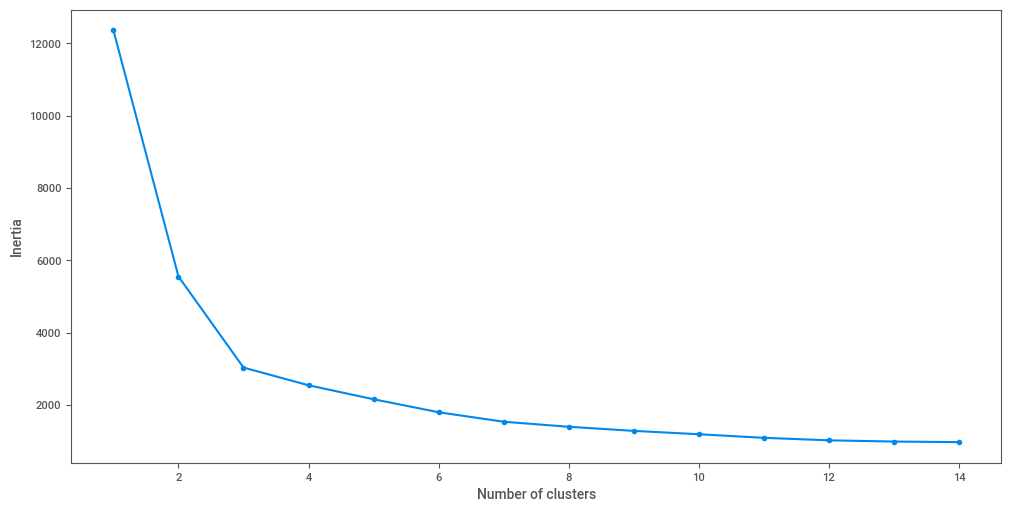

In [427]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [436]:
# building the model with n clusters

def clustering_evaluating(n):
    print('No of clusters : ',n)
    kmeans = KMeans( n_clusters = n, init='k-means++',random_state=44)
    kmeans.fit(scaled_features)

    print('inertia : ',kmeans.inertia_)
    print('silhouette_score : ',silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))
    print('davies_bouldin_index : ', davies_bouldin_score(scaled_features, kmeans.labels_))
    print('calinski_harabasz_index : ', calinski_harabasz_score(scaled_features, kmeans.labels_))

In [438]:
for i in [2,3,6,7,8]:
    clustering_evaluating(i)


No of clusters :  2
inertia :  5554.6582280965185
silhouette_score :  0.5281645916599592
davies_bouldin_index :  0.7379835027809809
calinski_harabasz_index :  1163.188818504597
No of clusters :  3
inertia :  3037.431437931573
silhouette_score :  0.5523039218773647
davies_bouldin_index :  0.6879114705900461
calinski_harabasz_index :  1455.2820660309549
No of clusters :  6
inertia :  1801.3316923003993
silhouette_score :  0.5058316204706601
davies_bouldin_index :  0.8730805472391019
calinski_harabasz_index :  1108.1553267993781
No of clusters :  7
inertia :  1539.4755231463557
silhouette_score :  0.5473394649697788
davies_bouldin_index :  0.7440216023252276
calinski_harabasz_index :  1106.1567129550333
No of clusters :  8
inertia :  1399.6486979064148
silhouette_score :  0.43485761782544224
davies_bouldin_index :  1.0258386049119184
calinski_harabasz_index :  1055.2076688282466


In [446]:
# building the model with 3 clusters
kmeans = KMeans( n_clusters = 3, init='k-means++',random_state=44)
kmeans.fit(scaled_features)


KMeans(n_clusters=3, random_state=44)

In [447]:
# segmentation model interpretation and visualization

pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(final_outlet_data[['Outlet_ID','area(sqft)','IP1_total_units', 'IP2_total_units', 
       'IP3_total_units', 'IP4_total_units', 'IP5_total_units',
       'BP1_total_units', 'BP2_total_units', 'BP3_total_units',
       'BP4_total_units', 'BP5_total_units', 'total_volume', 'total_earning']])
frame['cluster'] = pred
frame

,Outlet_ID,area(sqft),IP1_total_units,IP2_total_units,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units,total_volume,total_earning,cluster
0,ID7203,5660,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,0.0,0.0,0.0,0.0,6949.2,3492920.0,0
1,ID1878,4138,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,0.0,0.0,0.0,0.0,7208.0,3606340.0,0
2,ID1740,5546,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,0.0,0.0,0.0,0.0,7517.4,3755910.0,0
3,ID4366,5134,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,0.0,0.0,0.0,0.0,8060.8,4060130.0,0
4,ID8358,4100,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,0.0,0.0,0.0,0.0,7875.6,3918700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,3858,4179.0,5104.0,3951.0,4503.0,6038.0,624.0,508.0,631.0,602.0,573.0,7693.0,5631520.0,0
947,ID2978,3495,4092.0,5710.0,4934.0,5006.0,4800.0,634.0,503.0,655.0,682.0,679.0,8061.4,5942690.0,0
948,ID6549,1141,4932.0,6148.0,4826.0,5844.0,5935.0,742.0,611.0,677.0,716.0,543.0,8826.0,6409630.0,0
949,ID1210,3322,4745.0,7020.0,5510.0,5246.0,5113.0,519.0,532.0,664.0,608.0,677.0,8526.8,6072600.0,0


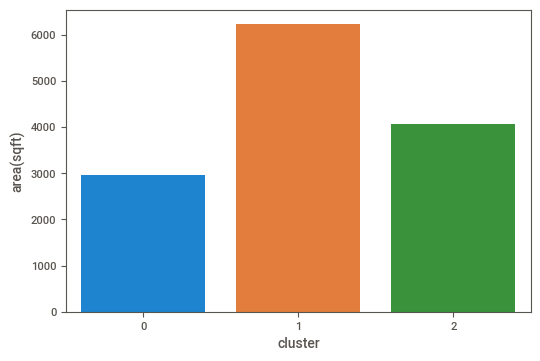

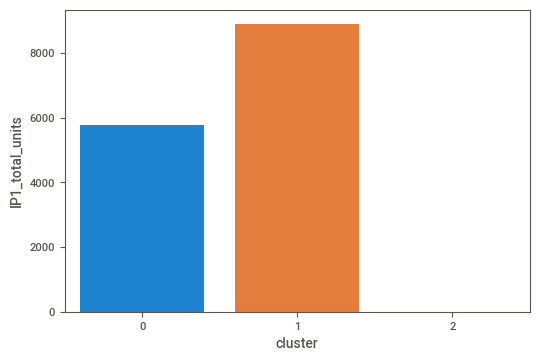

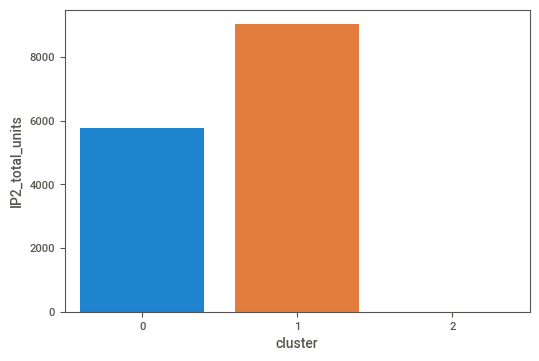

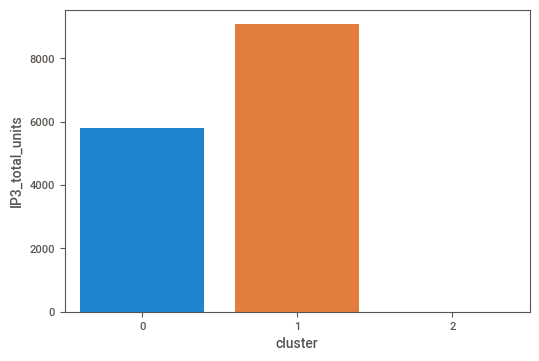

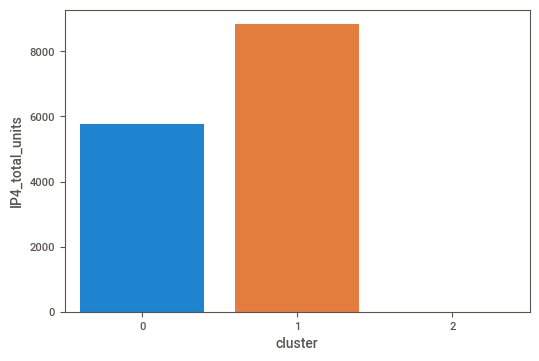

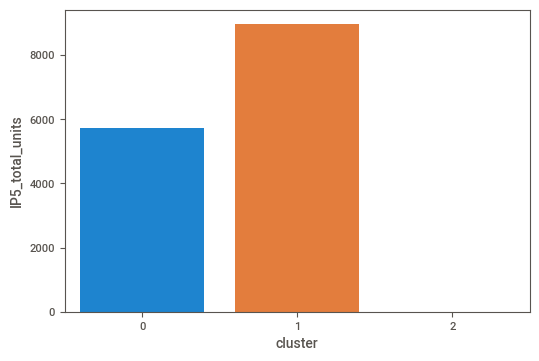

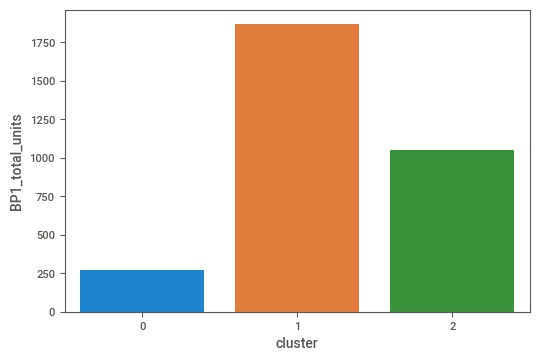

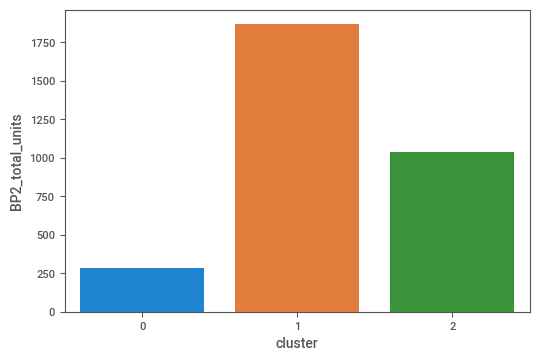

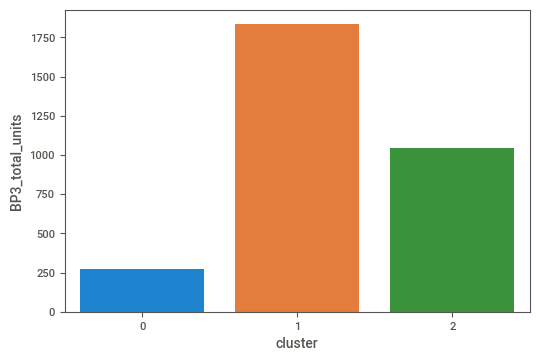

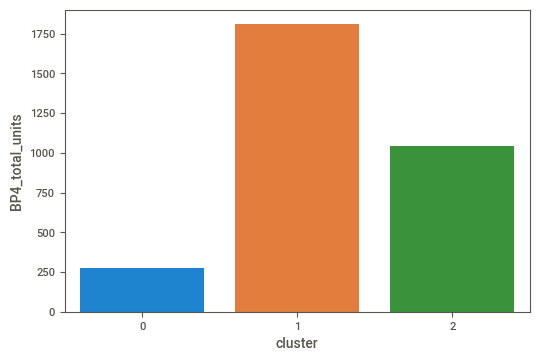

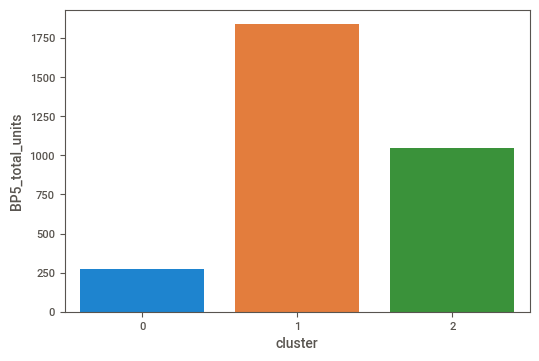

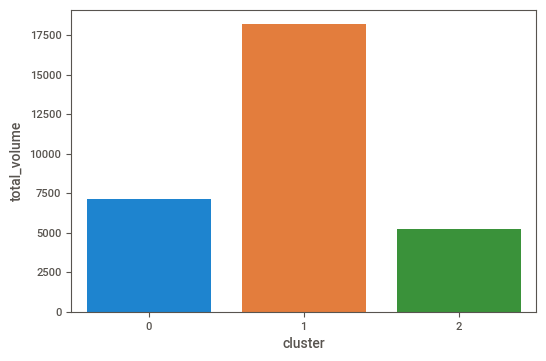

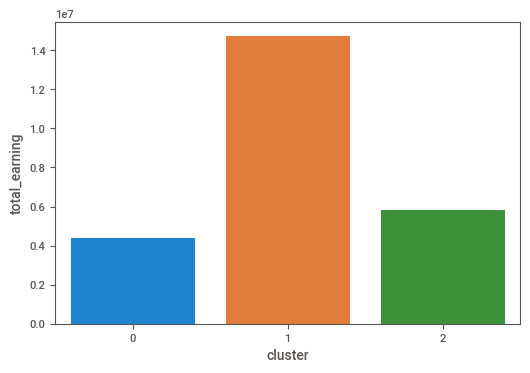

In [448]:
# visualize data
list1 = col_names
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()


In [449]:
avg_df

,cluster,area(sqft),IP1_total_units,IP2_total_units,IP3_total_units,IP4_total_units,IP5_total_units,BP1_total_units,BP2_total_units,BP3_total_units,BP4_total_units,BP5_total_units,total_volume,total_earning
0,0,2959.949881,5779.274463,5762.983294,5801.532220,5757.627685,5718.599045,271.329356,281.343675,274.105012,275.689737,275.236277,7141.707399,4.411131e+06
1,1,6230.772277,8898.861386,9040.349835,9077.306931,8836.795380,8966.729373,1869.036304,1869.207921,1835.313531,1810.735974,1839.970297,18188.272607,1.472666e+07
2,2,4067.764192,0.000000,0.000000,0.000000,0.000000,0.000000,1050.554585,1039.524017,1043.113537,1045.039301,1046.034934,5224.266376,5.799400e+06


In [450]:
# recommend a most suitable freezer

freezer_data

,Freezer_Name,Model_Number,Volume_Capacity,Cost
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [459]:
# ROI and sales ratio
roi_lst_lst=[]
sales_ratio_lst_lst = []
i=0
for cluster_id in avg_df['cluster'].unique():
    roi_lst=[]
    sales_ratio_lst = []
    j=0
    # print(cluster_id,end=' ')
    for freezer in freezer_data['Model_Number'].unique():
        a = (avg_df.loc[avg_df.cluster==cluster_id]['total_earning'])
        b = (freezer_data.loc[freezer_data.Model_Number==freezer]['Cost'])
        c = (avg_df.loc[avg_df.cluster==cluster_id]['total_volume'])
        b = (freezer_data.loc[freezer_data.Model_Number==freezer]['Volume_Capacity'])
        roi = a[i]/b[j]/12
        sales_ratio = c[i]/b[j]/12
        # print(a[i],b[j],roi)
        # print(freezer,roi,end=',')
        roi_lst.append(roi)
        sales_ratio_lst.append(sales_ratio)
        j+=1
    roi_lst_lst.append(roi_lst)
    sales_ratio_lst_lst.append(sales_ratio_lst)
    i+=1
    # print(end='\n')

In [463]:
# ROI
for i in roi_lst_lst:
    print(i)
    print(max(i),np.argsort(i)+1)

[6683.531568669993, 4901.256483691329, 3063.28530230708, 12253.14120922832, 2450.6282418456644, 5655.295942720763, 3675.942362768496, 14703.769451073984, 4594.92795346062, 1837.971181384248]
14703.769451073984 [10  5  3  7  9  2  6  1  4  8]
[22313.121212121212, 16362.955555555556, 10226.847222222223, 40907.38888888889, 8181.477777777778, 18880.333333333332, 12272.216666666667, 49088.86666666667, 15340.270833333334, 6136.108333333334]
49088.86666666667 [10  5  3  7  9  2  6  1  4  8]
[8786.970027788804, 6443.778020378457, 4027.361262736535, 16109.44505094614, 3221.8890101892284, 7435.128485052065, 4832.833515283843, 19331.33406113537, 6041.041894104804, 2416.4167576419213]
19331.33406113537 [10  5  3  7  9  2  6  1  4  8]


In [462]:
#  Sales Ratio
for i in sales_ratio_lst_lst:
    print(i)
    print(max(i),np.argsort(i)+1)

[10.820768785709115, 7.935230442853352, 4.959519026783345, 19.83807610713338, 3.967615221426676, 9.156035126369252, 5.951422832140014, 23.805691328560055, 7.439278540175017, 2.975711416070007]
23.805691328560055 [10  5  3  7  9  2  6  1  4  8]
[27.55798879887988, 20.209191785845245, 12.630744866153279, 50.522979464613115, 10.104595892922623, 23.318298214436822, 15.156893839383935, 60.62757535753574, 18.94611729922992, 7.5784469196919675]
60.62757535753574 [10  5  3  7  9  2  6  1  4  8]
[7.9155551144634115, 5.804740417273169, 3.6279627607957305, 14.511851043182922, 2.9023702086365843, 6.697777404545963, 4.353555312954876, 17.414221251819505, 5.441944141193595, 2.176777656477438]
17.414221251819505 [10  5  3  7  9  2  6  1  4  8]
